<a href="https://colab.research.google.com/github/SerbC/siva_2025/blob/main/SIVA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import glob
import random
from matplotlib import pyplot as plt


In [3]:
base_path = "/content/drive/My Drive/fac/Laborator/Images/"
file_list = []
for i in range(4):
  file_list.append(glob.glob(base_path+str(i)+"/*.jpg"))

print(np.shape(file_list))
for a in file_list:
  print(a)

(4, 10)
['/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg']
['/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator

In [5]:
random.seed(42)
indexes = random.sample(range(0,10), 7)
print(indexes)

[1, 0, 4, 9, 6, 5, 8]


In [7]:
train_files = []
test_files = []

for folder in file_list:
  temp = []
  for i in indexes:
    temp.append(folder[i])
  train_files.append(temp)
  test_files.append([x for x in folder if x not in temp])

print(train_files)
print(test_files)
print(np.shape(train_files))

[['/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/9.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/8.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/2/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/4.jpg', '/content/drive/My Drive/fac/Laborator/Ima

## IDEI extragere mana

Primi pasi:
* eliminarea zgomotului [DONE]
* pre-procesarea imaginii pentru reducere dimensiunii si corectarea spatiului de culoare [DONE]

Pasi ulteriori:
*   extragere contururi
    * sobel
    * morfological opps
    * canny
*   eliminare fundal prin eliminarea culorii constante din toate pozele
*   bynary th
*   gasirea minii prin culoare



In [8]:
train_images = []
test_images = []

for label in train_files:
  s = [ ]
  for l in label:
    s.append(cv2.imread(l))
  train_images.append(s)
for label in test_files:
  s = [ ]
  for l in label:
    s.append(cv2.imread(l))
  test_images.append(s)

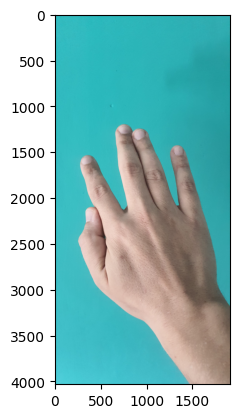

In [14]:
img = train_images[0][0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
np.shape(img)

(4032, 1908, 3)

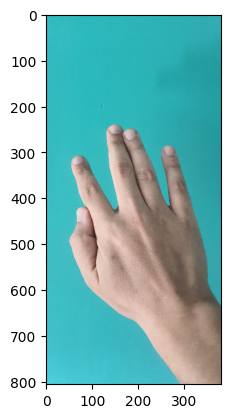

In [47]:
scale_proc = 20
nw = int(img.shape[1] * scale_proc / 100)
nh = int(img.shape[0] * scale_proc / 100)
dim = (nw,nh)
resized_img = cv2.resize(img, dim)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))

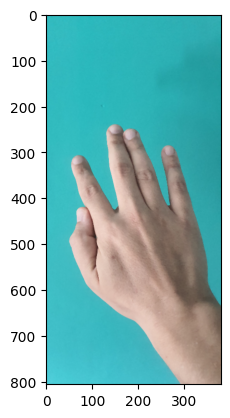

In [48]:
resized_img_clean = cv2.medianBlur(resized_img, 3)
plt.imshow(cv2.cvtColor(resized_img_clean, cv2.COLOR_BGR2RGB))

In [32]:
gray= cv2.cvtColor(resized_img_clean, cv2.COLOR_BGR2GRAY)

In [33]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

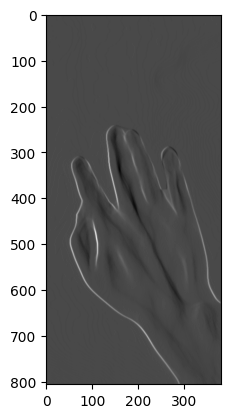

In [34]:
plt.imshow(sobel_x, cmap="gray")

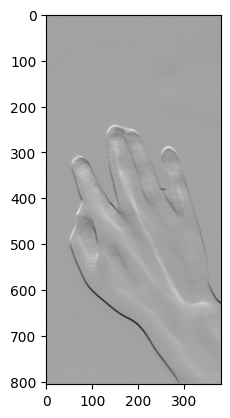

In [35]:
plt.imshow(sobel_y, cmap="gray")

In [36]:
print(sobel_y.max())

1029.0


In [44]:
absx= cv2.convertScaleAbs(sobel_x)
absy = cv2.convertScaleAbs(sobel_y)
print(absx.max())
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)

255


In [45]:
edge[edge < 150] = 0

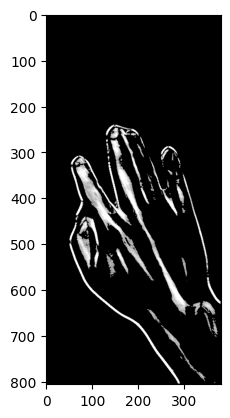

In [46]:
plt.imshow(edge, cmap="gray")

In [50]:
def binarizare_piele(img):
  R=img[:,:,0]
  G=img[:,:,1]
  B=img[:,:,2]
  C1 = np.zeros((img.shape[0], img.shape[1]))
  C2 = np.zeros((img.shape[0], img.shape[1]))
  C3 = np.zeros((img.shape[0], img.shape[1]))
  C4 = np.zeros((img.shape[0], img.shape[1]))
  C5 = np.zeros((img.shape[0], img.shape[1]))
  C6 = np.zeros((img.shape[0], img.shape[1]))
  C7 = np.zeros((img.shape[0], img.shape[1]))
  rez = np.zeros((img.shape[0], img.shape[1]))

  C1[np.logical_and(R > 95, G > 40, B > 20)] = 1
  C2[(np.maximum(np.maximum(R, G), B) - np.minimum(np.minimum(R, G), B)) > 15] = 1
  C3[np.absolute(R - G) > 15] = 1
  C4[np.logical_and(R > G, R > B)] = 1

  C5[np.logical_and(R > 220, G > 210, B > 170)] = 1
  C6[np.absolute(R - G) <= 15] = 1
  C7[np.logical_and(R > B, G > B)] = 1


  caz1 = np.logical_and(np.logical_and(C1 == 1, C2 == 1, C3 == 1), C4 == 1)
  caz2 = np.logical_and(C5 ==1, C6 == 1, C7 == 1)

  rez[np.logical_or(caz1 == 1, caz2 == 1)] = 1

  return rez

In [51]:
bin = binarizare_piele(resized_img_clean)

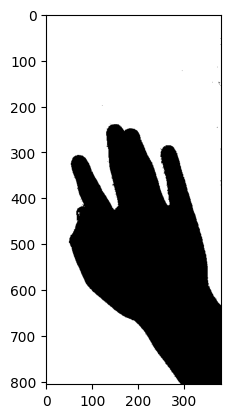

In [52]:
plt.imshow(bin, cmap="gray")